# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:**

1.Минимизируемый функционал:
$$
L(W, Z) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}-w_2z_{i2}\|^2.
$$

2.Докажим, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w1, w2$:

$$
L(W, Z) = \sum\limits_{i = 1}^n(x_i - w_1z_{i1}-w_2z_{i2})^T(x_i - w_1z_{i1}-w_2z_{i2}) = \sum\limits_{i = 1}^n(x_i^T-z_{i1}w_1^T-z_{i2}w_2^T)(x_i - w_1z_{i1}-w_2z_{i2}) = \sum\limits_{i = 1}^n(x_i^Tx_i - z_{i1}x_i^Tw_1 - z_{i2}x_i^Tw_2 - z_{i1}w_1^Tx_i + z_{i1}^2w_1^Tw_1 + z_{i1}z_{i2}w_1^Tw_2 - z_{i2}w_2^Tx_i + z_{i1}z_{i2}w_2^Tw_1 + z_{i2}^2w_2^Tw_2)$$

При условии, что  $w_1^Tw_1=1, w_2^Tw_2=1, w_1^Tw_2=0$, мы получаем, что

$$L(W, Z) = \sum\limits_{i = 1}^n(x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2 + z_{i2}^2).$$

Возьмем частные производные:

$$\frac{∂L(W, Z)}{∂z_{i1}}= -2x_i^Tw_1 + 2z_{i1} = 0 ⇒ z_{i1} = x_i^Tw_1$$

$$\frac{∂L(W, Z)}{∂z_{i2}} = -2x_i^Tw_2 + 2z_{i2} = 0 ⇒ z_{i2} = x_i^Tw_2$$

3.Докажим, что  $w1,  w2$  — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно:

$$L(W) =\sum\limits_{i = 1}^n(x_i^Tx_i - 2x_i^Tw_1x_i^Tw_1 - 2x_i^Tw_2x_i^Tw_2 + (x_i^Tw_1)^2 + (x_i^Tw_2)^2)= ∑_{i=1}^n (x_i^Tx_i - (x_i^Tw_1)^2 - (x_i^Tw_2)^2)= const - \sum\limits_{i = 1}^n(w_1^Tx_ix_i^Tw_1 + w_2^Tx_ix_i^Tw_2) = const - (w_1^TΣw_1+w_2^TΣw_2)$$

Минимизация L(W) эквивалентна максимизации $w_1^TΣw_1+w_2^TΣw_2$ при условии $w_1^Tw_1=1, w_2^Tw_2=1, w_1^Tw_2=0$.

Применим метод множетелей Лаганжа.Составим функцию Ланранжа:
$$LagLoss = -(w_1^TΣw_1+w_2^TΣw_2)-\lambda_1(w_1^Tw_1-1)-\lambda_ (w_2^Tw_2-1)$$

$$\frac{∂LagLoss}{∂w_1}= 2Σw_1 -2\lambda_1w_1=0⇒Σw_1 =\lambda_1w_1$$

$$\frac{∂LagLoss}{∂w_1}= 2Σw_2 -2\lambda_2w_2=0⇒Σw_2 =\lambda_2w_2$$

Вектора $w_1, w_2$ являются собственными векторами выборочной ковариационной матрицы $Σ$ и соответсвуют двум наибольшим собственным значениям, поскольку мы максимизируем $w_1^TΣw_1+w_2^TΣw_2$.

4.Покажим, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:**

In [16]:
import numpy as np
X = np.random.randint(0, 10, size=(3, 3))

#Найдем симметричную матрицу XX^T
A = X @ X.T

# Найдем собственнные значения и векторы матрицы A
eigenvalues, U = np.linalg.eig(A)

# Проверим что U ортогональна
print('U^TU = E')
print(np.round(U.T @ U, 3))
print()

Λ = U.T @ X @ X.T @ U
print('U^TXX^TU равна диоганальной матрицe')
print(np.round(Λ,2))

U^TU = E
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

U^TXX^TU равна диоганальной матрицe
[[251.57   0.     0.  ]
 [  0.    43.22   0.  ]
 [  0.     0.    14.2 ]]


In [17]:
print('XX^TU = UΛ: ', np.allclose(X @ X.T @ U, U @ Λ))

print('X^TXX^TU = X^TUΛ: ', np.allclose(X.T @ X @ X.T @ U, X.T @ U @ Λ))

print('(X^TX)(X^TU) = X^TUΛ: ', np.allclose((X.T @ X) @ (X.T @ U), X.T @ U @ Λ))

XX^TU = UΛ:  True
X^TXX^TU = X^TUΛ:  True
(X^TX)(X^TU) = X^TUΛ:  True


In [19]:
# Проверим ортогональность столбцов матрицы  XTU
print('Матрица UTXXTU равна диаганальной, но не единичной, значит ее столбцы ортогональны, но не ортонормированы')
print(np.round((U.T @ X) @ (X.T @ U), 5))

Матрица UTXXTU равна диаганальной, но не единичной, значит ее столбцы ортогональны, но не ортонормированы
[[251.57308   0.        0.     ]
 [  0.       43.22311   0.     ]
 [  0.        0.       14.20381]]


In [20]:
# Найдем нормы столбцов XTU
norms = np.linalg.norm(X.T @ U, axis=0)

# Приведем матрицу XTU к ортогональному виду
V = (X.T @ U)/norms
print('UTXXTU = E')
print(np.round(V.T @ V, 3))

UTXXTU = E
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

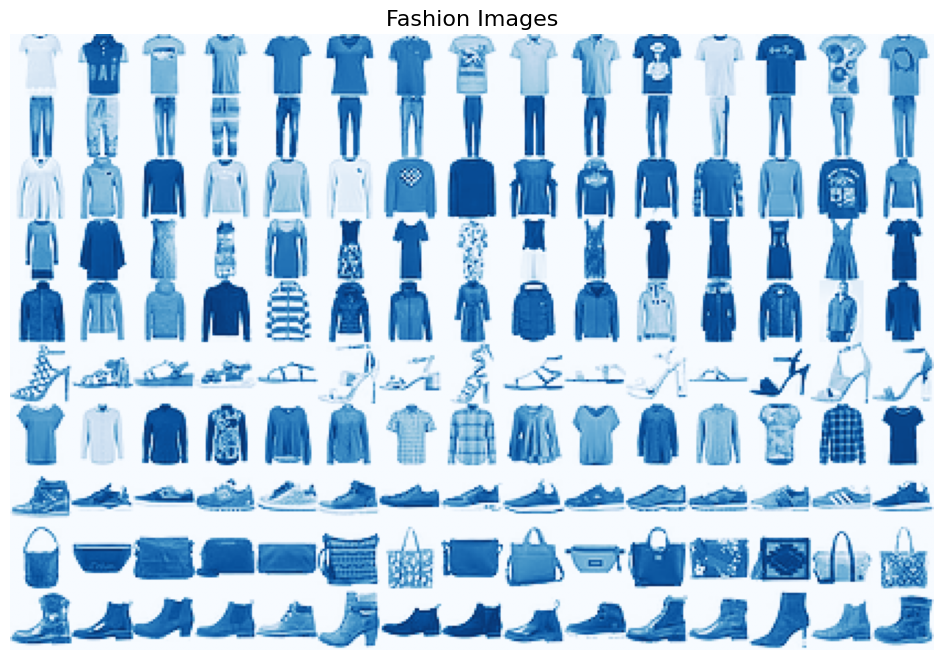

In [41]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [42]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

In [51]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression(max_iter=2000, tol=0.001, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42, tol=0.001)

In [ ]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.7381424298005053

**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** Показатель F1 можно интерпретировать как среднее гармоническое между точностью и полнотой, где наилучшее значение показателя F1 равно 1, а наихудшее — 0:
$$F1 = 2\times \frac{Precision\times Recall}{Precision+Recall}.$$

Среднее гармоническоеобладает важным свойством: оно близко к нулю, если хотя бы один аргументов близок к нулю. Поэтому оно является куда более предпочтительным, чем, скажем, среднее арифметическое: если алгоритм относит
все объекты к положительному классу, то Recall = 1, а Precision, скорее всего, будет небольшим. Но тогда среднее арифметическое будет больше, чем 0.5, что, конечно, никуда не годится.

F1-score обеспечивает баланс меду точностью и полнотой, что особенно полезено при работе с несбалансированными данными.

Главные минусы f1-score в том, что он полностью игнорирует информацию о TN и не учитывает разную стоимость ошибок FP и FN.

Параметр average='weighted' означает, что метрика f1-score считается для каждого класса отдельно, затем усредняется, придавая каждому классу вес, пропорциональный размеру этого класса в данных. Ипользуется для несбалансированных данных.

Другие парметры average:
* binary — только для бинарной классификации.
* macro — вычисляет F1 для каждого класса отдельно и уседняет результаты (все классы равны). Используется, когда все классы одинаково важны.
* micro — вычтсляет f1-score глобально путем суммирования TP/FP/FN по всем класса. Используется в многоклассовой классификации с несбалансированным распределением данных.
* samples — вычисляет F1 для каждого объекта отдельно и усредняет по всем объектам. Используется в многометочной классификации, когда один объект может принадлежать нескольким классам одновременно.

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

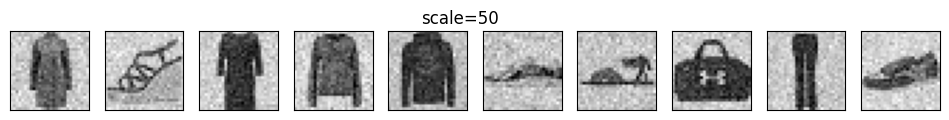

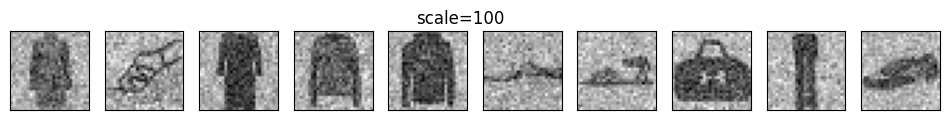

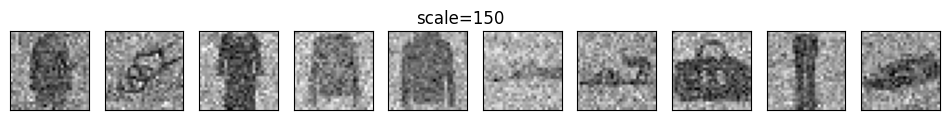

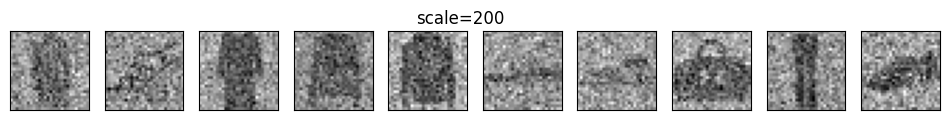

In [ ]:
scales = [50, 100, 150, 200]
X_test_noisy_scale = dict()
for scale in scales:
  X_test_noisy = X_test + np.random.normal(X_test, scale)
  X_test_noisy_scale[scale] = X_test_noisy
  fig, axes = plt.subplots(1, 10, figsize=(12, 1.5), subplot_kw={'xticks': [], 'yticks': []})
  for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
  fig.suptitle(f'scale={scale}', y=0.9)

**Ваши выводы:** При увеличении значения стандартного отклонения(scale), качество изображений становится хуже, более зашумленноe, поскольку значения пикселей начинают сильно отклоняться от исходных значений.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
for scale in X_test_noisy_scale:
  y_pred = model.predict(X_test_noisy_scale[scale])
  f1 = f1_score(y_test, y_pred, average='weighted')
  print(f'f1_score при scale={scale}: {f1:.4f}')

f1_score при scale=50: 0.6446
f1_score при scale=100: 0.5364
f1_score при scale=150: 0.4507
f1_score при scale=200: 0.3733


**Ваши выводы:** Чем сильнее зашумлены данные, тем значения f1-score становятся меньше, качество классификации ухудшается.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

In [17]:
from sklearn.decomposition import PCA

evs = [i/10 for i in range(1,10)]
restored_X_test_noisy_ev_scale = dict()

for scale in scales:
  restored_X_test_noisy_ev = dict()

  for ev in evs:
    pca = PCA(ev, random_state=42)
    X_test_noisy_pca = pca.fit_transform(X_test_noisy_scale[scale])
    restored_X_test_noisy = pca.inverse_transform(X_test_noisy_pca)
    restored_X_test_noisy_ev[ev] = restored_X_test_noisy
    fig, axes = plt.subplots(1, 10, figsize=(12, 1.5), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
      ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
    fig.suptitle(f'scale={scale}     explained_variance={ev}', y=0.9)
  restored_X_test_noisy_ev_scale[scale] = restored_X_test_noisy_ev

Output hidden; open in https://colab.research.google.com to view.

**Ваши выводы:** Во всех рассмотренных случаях с различным уровнем шума применение PCA позволило снизить зашумленность данных. Наилучшие результаты визуального восстановления наблюдаются при наименьшем уровне шума.

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [ ]:
for scale in scales:
  print(f'scale={scale}')
  for ev in evs:
    y_pred = model.predict(restored_X_test_noisy_ev_scale[scale][ev])
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'f1_score при explained_variance={ev}: {f1:.4f}')
  print('')

scale=50
f1_score при explained_variance=0.1: 0.0685
f1_score при explained_variance=0.2: 0.0685
f1_score при explained_variance=0.3: 0.1881
f1_score при explained_variance=0.4: 0.1881
f1_score при explained_variance=0.5: 0.4367
f1_score при explained_variance=0.6: 0.6131
f1_score при explained_variance=0.7: 0.6953
f1_score при explained_variance=0.8: 0.7548
f1_score при explained_variance=0.9: 0.7202

scale=100
f1_score при explained_variance=0.1: 0.0663
f1_score при explained_variance=0.2: 0.0663
f1_score при explained_variance=0.3: 0.2117
f1_score при explained_variance=0.4: 0.4840
f1_score при explained_variance=0.5: 0.6445
f1_score при explained_variance=0.6: 0.7053
f1_score при explained_variance=0.7: 0.6894
f1_score при explained_variance=0.8: 0.6120
f1_score при explained_variance=0.9: 0.5768

scale=150
f1_score при explained_variance=0.1: 0.0718
f1_score при explained_variance=0.2: 0.1892
f1_score при explained_variance=0.3: 0.4792
f1_score при explained_variance=0.4: 0.6616
f

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперсии (таблицы, графики, диаграммы). Сделайте выводы.

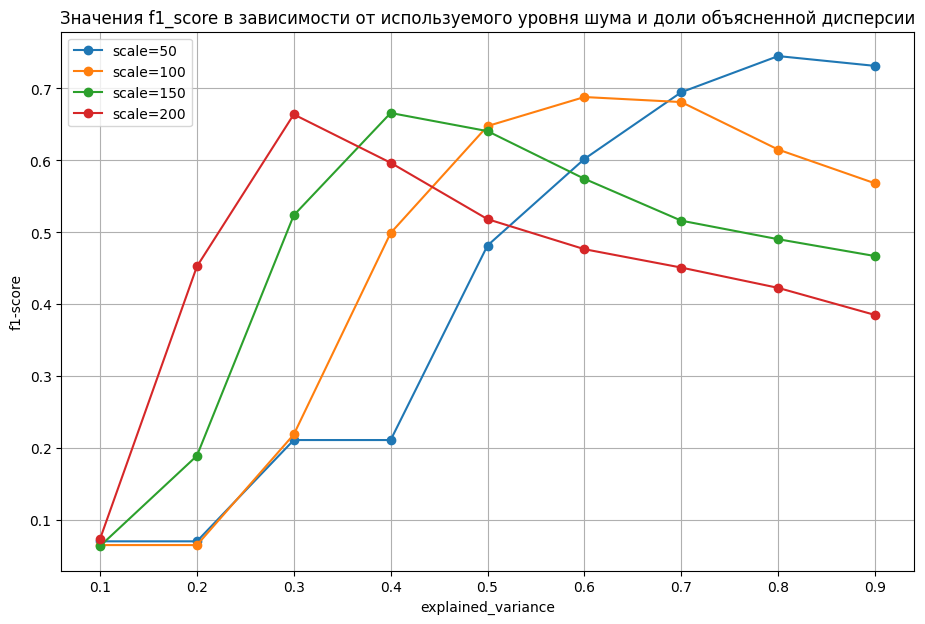

In [18]:
fig = plt.subplots(figsize=(11, 7))

for scale in scales:
  f1_scale =[]
  for ev in evs:
    y_pred = model.predict(restored_X_test_noisy_ev_scale[scale][ev])
    f1_scale.append(f1_score(y_test, y_pred, average='weighted'))

  plt.plot(evs, f1_scale, label = f'scale={scale}',  marker='o')
  plt.legend()
  plt.grid(True)
  plt.title('Значения f1_score в зависимости от используемого уровня шума и доли объясненной дисперсии')
  plt.xlabel('explained_variance')
  plt.ylabel('f1-score')

**Ваши выводы:** Во всех рассмотренных случаях применение PCA к зашумленным данным позволяет повысить значение метрики f1-score пр сравнению с значениями, полученными на данных, к котором PCA не применялся. При этом PCA демонстрирует наибольшую эффективность именно в условиях сильной зашумленности, где относительный прирост качества классификации оказывается максимальным.

При разных степеней зашумленности данных наилучшее значение f1-score достигается на разных значениях доли объясненной дисперсии. С ростом уровня шума требуется оставлять меньшее число главных компонент,что соответствует снижению доли объясненной дисперсии, чтобы отфильтровать шумовые компоненты.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**
$$
\mathbb{KL}(P|Q) = \sum\limits_{i,j}p_{ij} \log \frac{p_{ij}}{q_{ij}}=\sum\limits_{i,j}p_{ij} \log p_{ij}-\sum\limits_{i,j}p_{ij} \log {q_{ij}}.
$$

В случае использования SNE:

$q_{ij}=\frac{e^{-||y_j-y_i||^2}}{Z}$, где $Z = \sum\limits_{i,j\neq i} e^{-||y_j-y_i||^2}$

$\frac{∂\mathbb{KL}(P|Q)}{∂y_i}=\sum\limits_{i,j}p_{ij} \frac{∂\log {q_{ij}}}{∂y_i}$

$\frac{∂\log {q_{ij}}}{∂y_i}=\frac{∂}{∂y_i}(-||y_j-y_i||^2-\log{Z})=-2(y_j-y_i)-\frac{1}{Z}\frac{∂Z}{∂y_i}=-2(y_j-y_i)+\frac{2}{Z} \sum\limits_{i,j\neq i}(y_j-y_i) e^{-||y_j-y_i||^2}$

В случае использования T-SNE:

$q_{ij}=\frac{1}{Z(1+||y_j-y_i||^2)}$, где $Z = \sum\limits_{i,j\neq i} \frac{1}{1+||y_j-y_i||^2}$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [24]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


In [37]:
data.shape

(60, 10)

**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [ ]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [22]:
# @title
pip install opentsne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.4 MB/s eta 0:00:00


Text(0.5, 1.2, 'Влияние параметра perplexity')

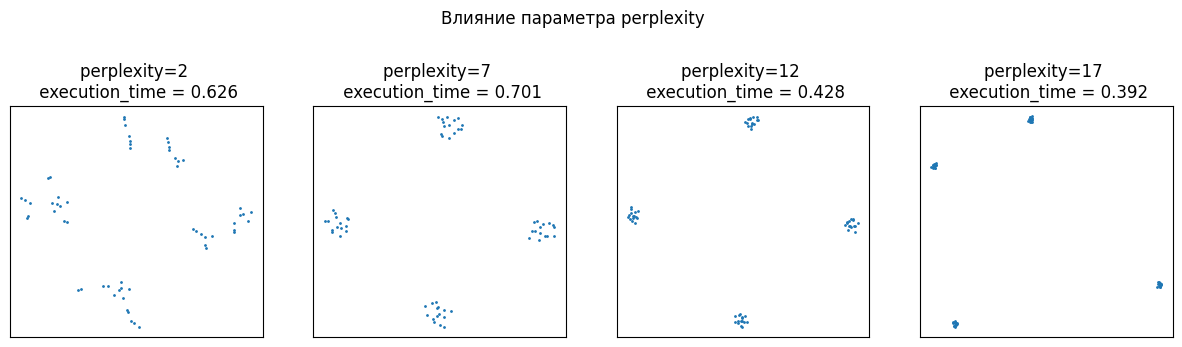

In [100]:
from openTSNE.sklearn import TSNE
import time

perplexities = [2, 7, 12, 17]

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=perplexities[i], random_state=42).fit_transform(data)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'perplexity={perplexities[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра perplexity', y = 1.2)

При маленьких значениях perplexity создаются мелки  изолированные кластеры.

Text(0.5, 1.2, 'Влияние параметра early_exaggeration')

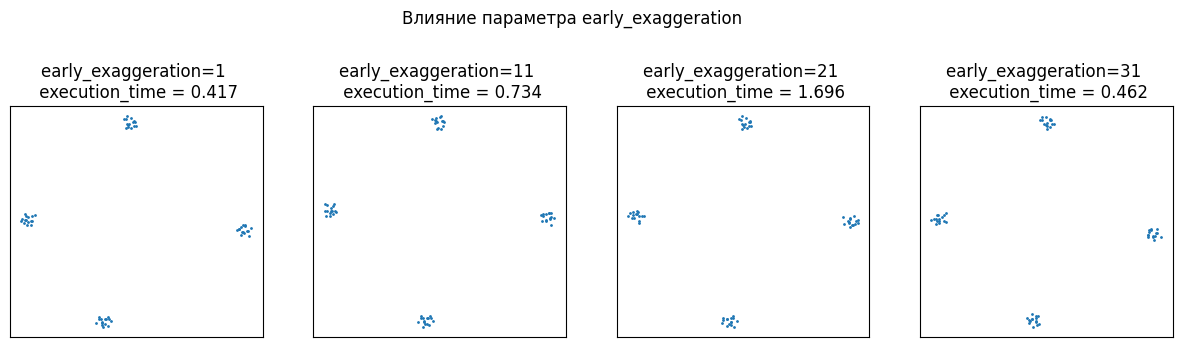

In [97]:
early_exaggerations = [1, 11, 21, 31]

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=12, early_exaggeration=early_exaggerations[i], random_state=42).fit_transform(data)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'early_exaggeration={early_exaggerations[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра early_exaggeration', y = 1.2)

Text(0.5, 1.2, 'Влияние параметра exaggeration')

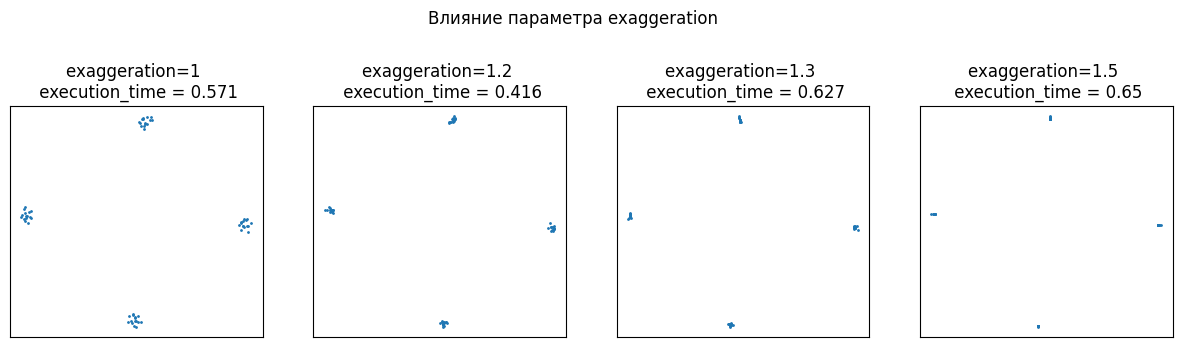

In [104]:
exaggerations = [1, 1.2, 1.3, 1.5]

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=12, exaggeration=exaggerations[i], random_state=42).fit_transform(data)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'exaggeration={exaggerations[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра exaggeration', y = 1.2)

При увеличении exaggerations кластеры сильнее отдаляются друг от друга.

Text(0.5, 1.2, 'Влияние параметра initialization')

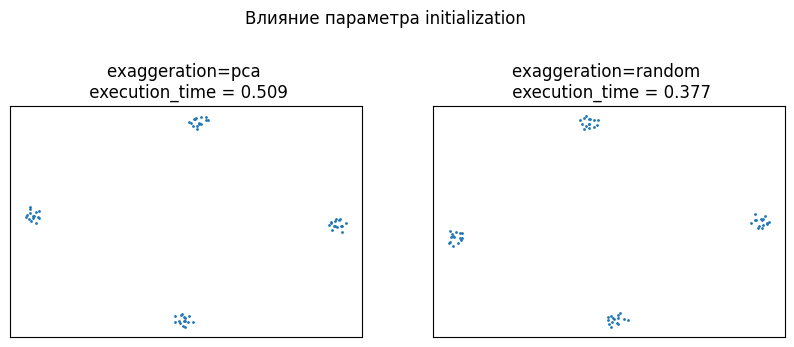

In [99]:
initializations = ['pca', 'random']

fig, axes = plt.subplots(1, 2, figsize=(10, 3), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=12, initialization=initializations[i], random_state=42).fit_transform(data)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'exaggeration={initializations[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра initialization', y = 1.2)

Text(0.5, 1.2, 'Влияние параметра dof')

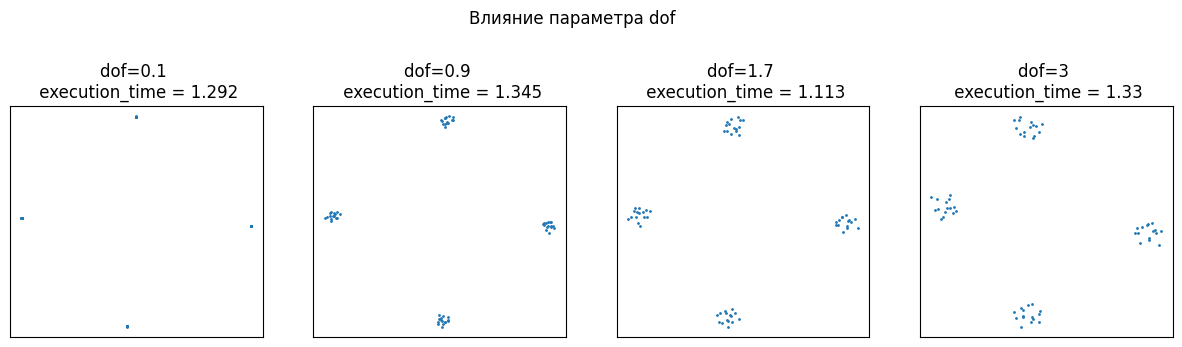

In [105]:
dofs = [0.1, 0.9, 1.7, 3]

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=12, dof=dofs[i], random_state=42).fit_transform(data)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'dof={dofs[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра dof', y = 1.2)

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

Text(0.5, 1.2, 'Влияние параметра perplexity')

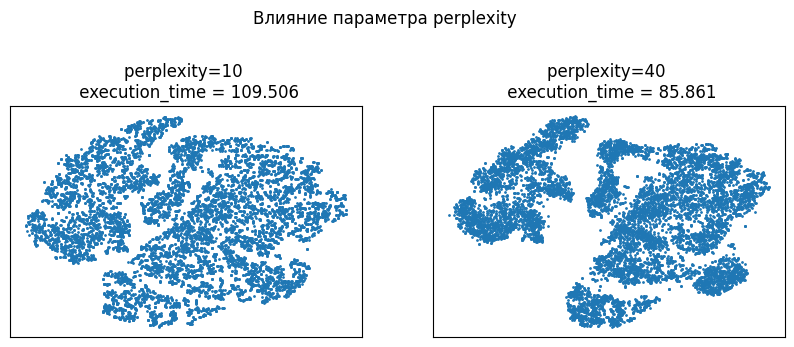

In [107]:
perplexities = [10, 40]

fig, axes = plt.subplots(1, 2, figsize=(10, 3), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=perplexities[i], random_state=42, initialization='pca').fit_transform(X)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'perplexity={perplexities[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра perplexity', y = 1.2)

Text(0.5, 1.2, 'Влияние параметра early_exaggeration')

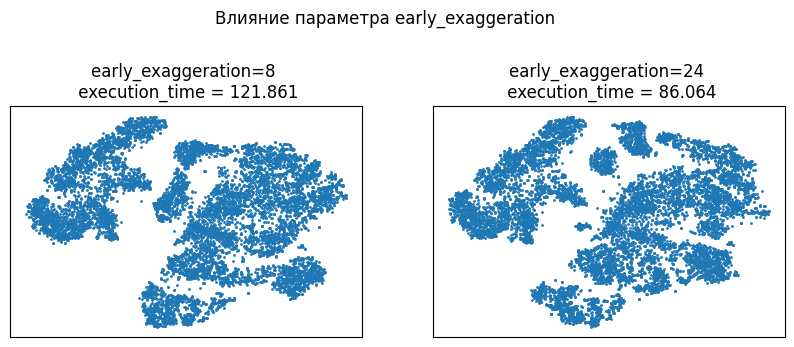

In [108]:
early_exaggerations = [8, 24]

fig, axes = plt.subplots(1, 2, figsize=(10, 3), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=40, early_exaggeration=early_exaggerations[i], random_state=42, initialization='pca').fit_transform(X)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'early_exaggeration={early_exaggerations[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра early_exaggeration', y = 1.2)

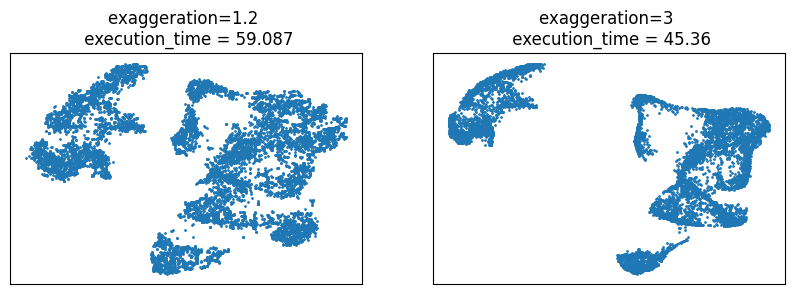

In [112]:
exaggerations = [1.2, 3]

fig, axes = plt.subplots(1, 2, figsize=(10, 3), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=40, early_exaggeration=8, exaggeration=exaggerations[i], random_state=42, initialization='pca').fit_transform(X)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'exaggeration={exaggerations[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра exaggeration', y = 1.2)

Text(0.5, 1.2, 'Влияние параметра dof')

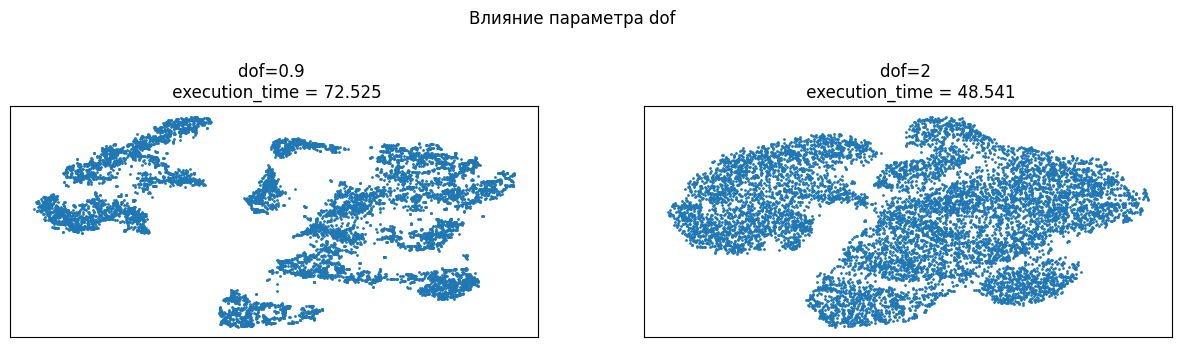

In [114]:
dofs = [0.9, 2]

fig, axes = plt.subplots(1, 2, figsize=(15, 3), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  start_time = time.time()
  X_embedded = TSNE(n_components=2, perplexity=40, early_exaggeration=8,  exaggeration=1.2, random_state=42, initialization='pca', dof=dofs[i]).fit_transform(X)
  end_time = time.time()
  ax.scatter(X_embedded[:,0], X_embedded[:,1], s=1)
  ax.set_title(f'dof={dofs[i]} \n execution_time = {round(end_time - start_time, 3)}')
fig.suptitle('Влияние параметра dof', y = 1.2)